In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Parâmetros físicos
mu_v = 1e-13        # Mobilidade de íons (m²/sV)
D = 10e-9           # Espessura do filme (10 nm)
R_ON = 1          # Resistência TiO2-x (Ohm)
R_OFF = 160       # Resistência TiO2  (Ohm)
V0 = 1              # Amplitude da voltagem (V)
freq = 5       # Frequência (Hz)
omega = 2*np.pi*freq # periodo (1 kHz)
w0 = 1e-9           # Largura inicial da região dopada (1 nm)


# Tempo de simulação
t_total = 2    # 1 s
h = 1e-4         # Passo de tempo (1 ms)
passo = int(t_total / h)

$\frac{dw(t)}{dt}$ = $\mu_v \frac{R_{\text{ON}}}{D} i(t)$

In [ ]:
def mem(t, w):
    tensao = V0 * np.sin(omega * t)           # Fonte de tensão oscilando
    R = R_ON * (w / D) + R_OFF * (1 - w / D)
    corrente = tensao / R                     # Lei de Ohm
    dwdt = mu_v * R_ON / D * corrente
    return dwdt

def rk4_step(func, t, w, h):
    k1 = func(t, w)
    k2 = func(t + h/2, w + h * k1/2)
    k3 = func(t + h/2, w + h * k2/2)
    k4 = func(t + h, w + h * k3)
    return w + h * (k1 + 2*k2 + 2*k3 + k4) / 6

In [ ]:
t_arr = np.zeros(passo)
w_arr = np.zeros(passo)
V_arr = np.zeros(passo)
I_arr = np.zeros(passo)
R_arr = np.zeros(passo)

w = w0 # Condição inicial

# runge-kutta 4
for i in range(passo):
    t = i * h
    V_arr[i] = V0 * np.sin(omega * t)
    R_arr[i] = R_ON * (w / D) + R_OFF * (1 - w / D)
    I_arr[i] = V_arr[i] / R_arr[i]

    w = rk4_step(mem, t, w, h)
    w = np.clip(w, 0, D)  # Garante limites físicos

    # Armazenar valores
    t_arr[i] = t
    w_arr[i] = w

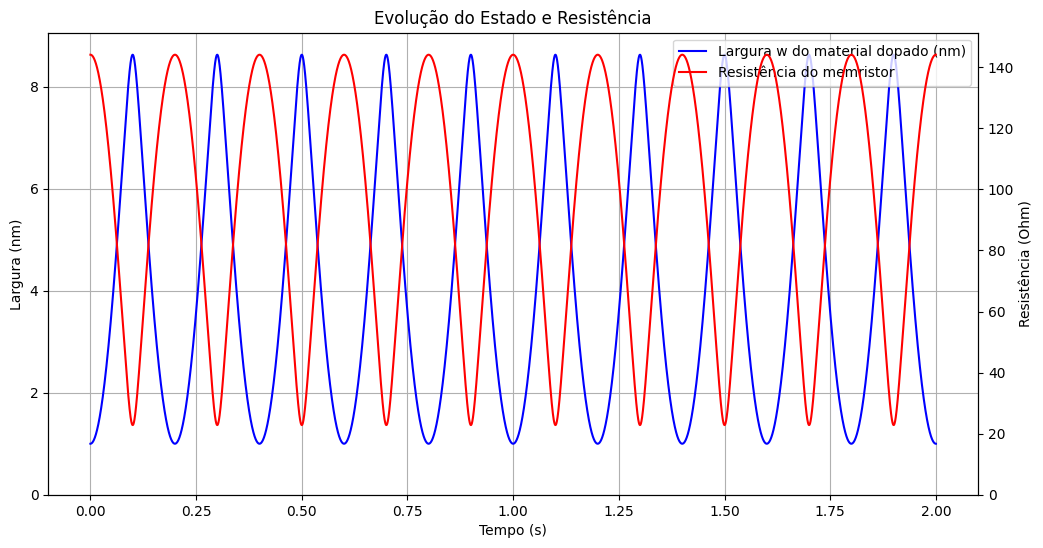

In [ ]:
# Gráfico 1: Estado e Resistência
fig, ax1 = plt.subplots(figsize=(12, 6))

ymax = lambda arr: max(arr) + max(arr) * 5e-2

ax1.plot(t_arr, w_arr * 1e9, label='Largura w do material dopado (nm)', color='blue')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Largura (nm)')
ax1.set_ylim(0, ymax(w_arr * 1e9))

ax2 = ax1.twinx()
ax2.plot(t_arr, R_arr, label='Resistência do memristor', color='red')
ax2.set_ylim(0, ymax(R_arr))
ax2.set_ylabel('Resistência (Ohm)')

ax1.grid(True)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.title('Evolução do Estado e Resistência')
plt.show()

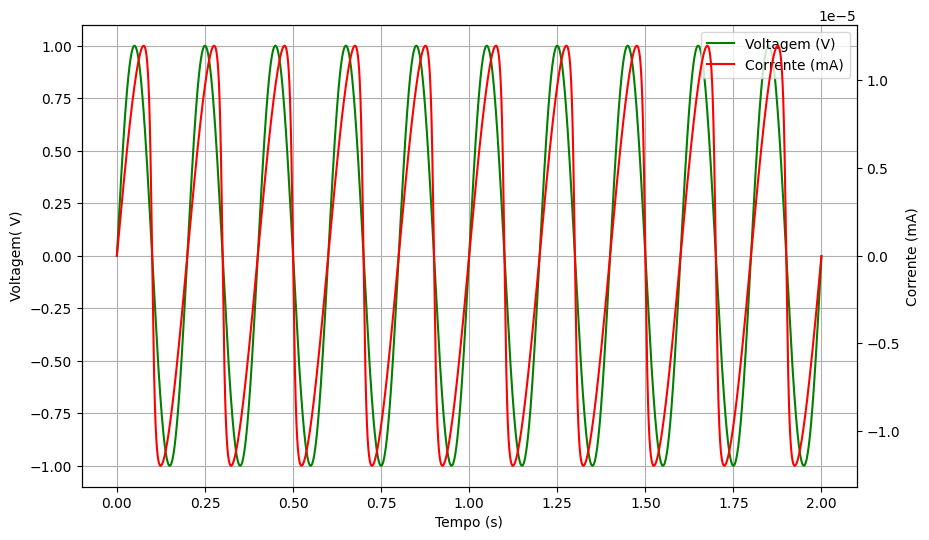

In [ ]:
fig1, ax3 = plt.subplots(figsize=(10, 6))

ax3.plot(t_arr, V_arr, label='Voltagem (V)', color='g')
ax3.set_xlabel('Tempo (s)')
ax3.set_ylabel('Voltagem( V)')

ax4 = ax3.twinx()
ax4.plot(t_arr, I_arr * 1e-3, label='Corrente (mA)', color='red')
ax4.set_ylabel('Corrente (mA)')

ax3.grid(True)

lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3 + labels4, loc='upper right')
plt.show()

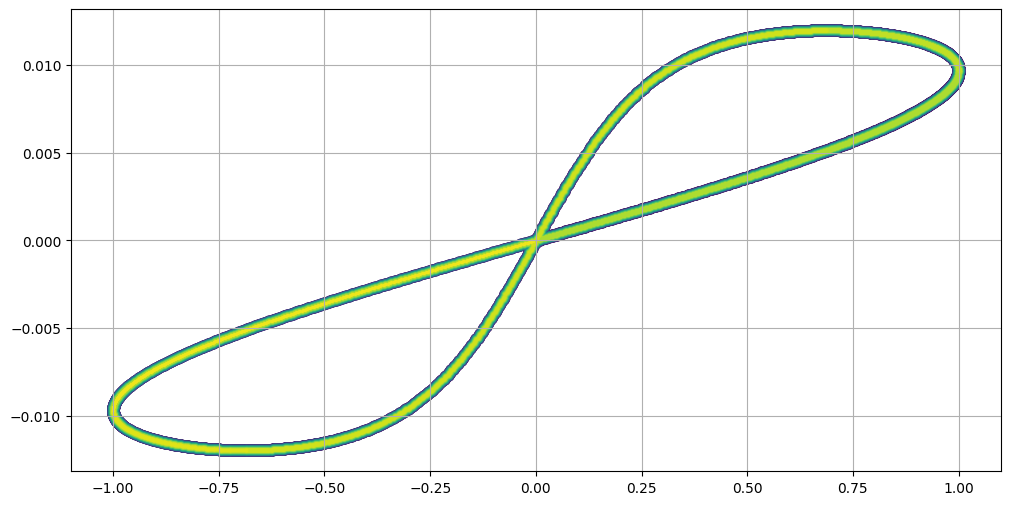

In [ ]:
# Gráfico 2: Histerese V-I
plt.figure(figsize=(12, 6))
diff = np.diff(I_arr)/np.diff(V_arr)  # dI/dV
sinal = np.sign(diff)  # Capturar o sinal
muda = np.where(np.diff(sinal) != 0)[0] + 1 #

v_partes = np.split(V_arr[:-1], muda)
i_partes = np.split(I_arr[:-1], muda)

n_partes = len(v_partes)
initial_size = 70
size_reduction = initial_size / n_partes

for i, (v_seg, i_seg) in enumerate(zip(v_partes, i_partes)):
    color = plt.cm.viridis(i/n_partes)
    size = initial_size - i*size_reduction # Minimum size of 10
    plt.scatter(v_seg, i_seg, color=color, s=size, label=f'Segment {i+1}')

plt.grid(True)
plt.show()

In [ ]:
muda = np.where(np.diff(sinal) != 0)[0] + 1 #
print(muda)

[  500   759  1241  1500  2500  2759  3241  3500  4500  4759  5241  5500
  6500  6759  7241  7500  8500  8759  9241  9500 10500 10759 11241 11500
 12500 12759 13241 13500 14500 14759 15241 15500 16500 16759 17241 17500
 18500 18759 19241 19500]


#Layout dos Gráficos igual ao PAPER RK normal


/tmp/ipython-input-8-243722116.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


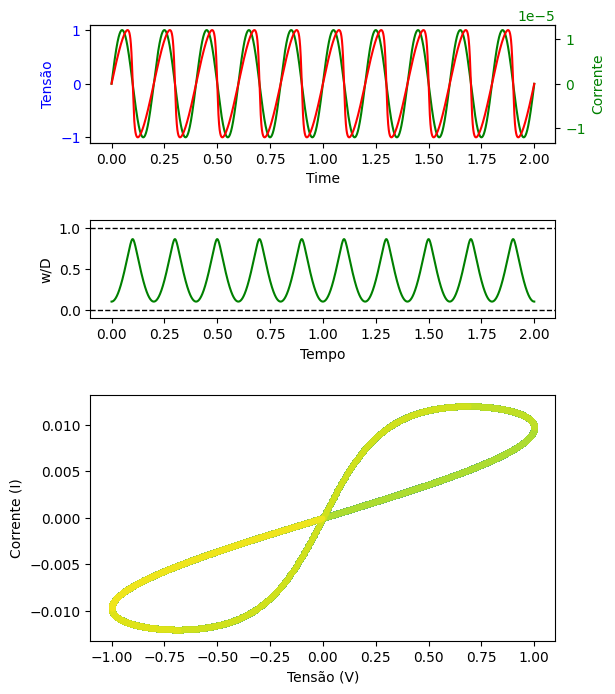

In [ ]:
import matplotlib.gridspec as gridspec

# Criar a figura e o layout com 3 linhas
fig = plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1.2, 1, 2.5], hspace=0.5)

# --- Gráfico 1: tensão e corrente vs tempo com eixos duplos ---
ax1 = fig.add_subplot(gs[0])
ax1.set_xlabel("Time")
ax1.set_ylabel("Tensão", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1_right = ax1.twinx()
ax1_right.set_ylabel("Corrente", color='green')
ax1_right.tick_params(axis='y', labelcolor='green')

ax1.plot(t_arr, V_arr, label='Voltagem (V)', color='g')
ax1_right.plot(t_arr, I_arr * 1e-3, label='Corrente (mA)', color='red')

# --- Gráfico 2: w/D vs tempo ---
ax2 = fig.add_subplot(gs[1])
ax2.set_xlabel("Tempo")
ax2.set_ylabel("w/D")
ax2.set_ylim(-0.1, 1.1)  # como no artigo
ax2.plot(t_arr, w_arr/D, label='Tensão (V)', color='g')

# --- Gráfico 3: I vs V ---
diff = np.diff(I_arr) / np.diff(V_arr)
sinal = np.sign(diff)
muda = np.where(np.diff(sinal) != 0)[0] + 1
ax2.axhline(1, linestyle='--', color='black', linewidth=1)
ax2.axhline(0, linestyle='--', color='black', linewidth=1)

# Dividir os dados em segmentos baseados nos pontos onde a derivada muda de sinal
ax3 = fig.add_subplot(gs[2])

v_partes = np.split(V_arr[:-1], muda)
i_partes = np.split(I_arr[:-1], muda)

n_partes = len(v_partes)
initial_size = 1
size_reduction = initial_size / n_partes

for i, (v_seg, i_seg) in enumerate(zip(v_partes, i_partes)):
    color = plt.cm.viridis(i / n_partes)
    size = max(initial_size - i * size_reduction, 10)
    ax3.scatter(v_seg, i_seg, color=color, s=size, label=f'Segmento {i+1}')

ax3.set_xlabel('Tensão (V)')
ax3.set_ylabel('Corrente (I)')

V_arr_rk4 = V_arr
I_arr_rk4 = I_arr

# Exibir
plt.tight_layout()
plt.show()

In [ ]:
# Após sua simulação anterior
import numpy as np

# Calcular potência instantânea
P = V_arr * I_arr

# Energia total "dissipada"
E_total = np.trapz(P, t_arr)

# Energia por ciclo
T = 2*np.pi / omega  # Período
num_ciclos = t_total / T
E_por_ciclo = E_total / num_ciclos

print(f"Energia dissipada por ciclo: {E_por_ciclo:.4e} Joules")

Energia dissipada por ciclo: 1.1128e-03 Joules


/tmp/ipython-input-9-1631670038.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_total = np.trapz(P, t_arr)


# RK Multi Passos

In [ ]:
# reseta
t_arr = np.zeros(passo)
w_arr = np.zeros(passo)
V_arr = np.zeros(passo)
I_arr = np.zeros(passo)
R_arr = np.zeros(passo)

w = w0

# Para armazenar derivadas
f_arr = np.zeros(passo)

# Primeiros 2 passos com RK4 para iniciar o método multi-passos
for i in range(2):
    t = i * h
    V_arr[i] = V0 * np.sin(omega * t)
    R_arr[i] = R_ON * (w / D) + R_OFF * (1 - w / D)
    I_arr[i] = V_arr[i] / R_arr[i]
    f_arr[i] = mem(t, w)

    w = rk4_step(mem, t, w, h)
    w = np.clip(w, 0, D)
    t_arr[i] = t
    w_arr[i] = w

for i in range(2, passo):
    t = i * h
    V_arr[i] = V0 * np.sin(omega * t)
    R_arr[i] = R_ON * (w / D) + R_OFF * (1 - w / D)
    I_arr[i] = V_arr[i] / R_arr[i]

    # AB3
    w_next = w + (h / 12) * (23 * f_arr[i-1] - 16 * f_arr[i-2] + 5 * f_arr[i-3])
    w_next = np.clip(w_next, 0, D)

    t_arr[i] = t
    w_arr[i] = w_next

    # Atualiza f_arr com novo valor de derivada
    f_arr[i] = mem(t, w_next)

    # Atualiza w para próximo passo
    w = w_next

V_arr_ab3 = V_arr
I_arr_ab3 = I_arr

In [ ]:
# Calcular a derivada dI/dV para identificar mudanças de inclinação
diff = np.diff(I_arr) / np.diff(V_arr)
sinal = np.sign(diff)
muda = np.where(np.diff(sinal) != 0)[0] + 1

# Dividir os dados em segmentos baseados nos pontos onde a derivada muda de sinal
v_partes = np.split(V_arr[:-1], muda)
i_partes = np.split(I_arr[:-1], muda)

n_partes = len(v_partes)
initial_size = 100
#size_reduction = initial_size / n_partes


/tmp/ipython-input-12-403986465.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


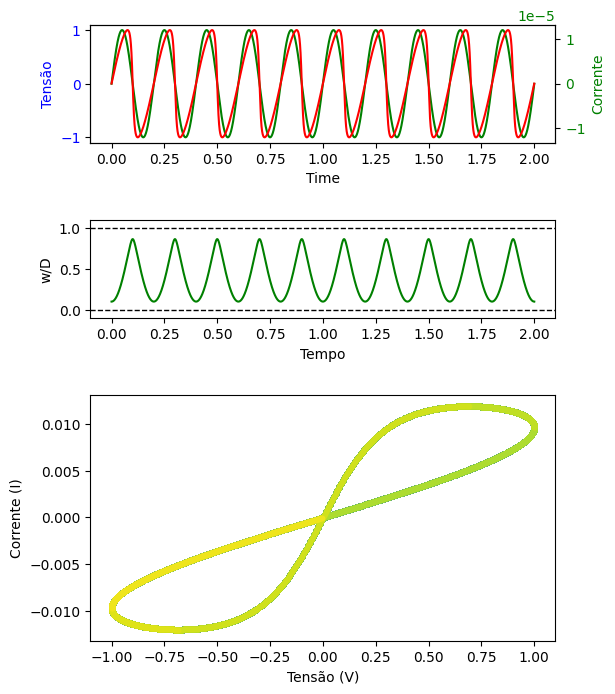

In [ ]:

# Criar a figura e o layout com 3 linhas
fig = plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1.2, 1, 2.5], hspace=0.5)

# --- Gráfico 1: tensão e corrente vs tempo com eixos duplos ---
ax1 = fig.add_subplot(gs[0])
ax1.set_xlabel("Time")
ax1.set_ylabel("Tensão", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1_right = ax1.twinx()
ax1_right.set_ylabel("Corrente", color='green')
ax1_right.tick_params(axis='y', labelcolor='green')

ax1.plot(t_arr, V_arr, label='Voltagem (V)', color='g')
ax1_right.plot(t_arr, I_arr * 1e-3, label='Corrente (mA)', color='red')

# --- Gráfico 2: w/D vs tempo ---
ax2 = fig.add_subplot(gs[1])
ax2.set_xlabel("Tempo")
ax2.set_ylabel("w/D")
ax2.set_ylim(-0.1, 1.1)  # como no artigo
ax2.plot(t_arr, w_arr/D, label='Tensão (V)', color='g')

# --- Gráfico 3: I vs V ---
diff = np.diff(I_arr) / np.diff(V_arr)
sinal = np.sign(diff)
muda = np.where(np.diff(sinal) != 0)[0] + 1
ax2.axhline(1, linestyle='--', color='black', linewidth=1)
ax2.axhline(0, linestyle='--', color='black', linewidth=1)

# Dividir os dados em segmentos baseados nos pontos onde a derivada muda de sinal
ax3 = fig.add_subplot(gs[2])

v_partes = np.split(V_arr[:-1], muda)
i_partes = np.split(I_arr[:-1], muda)

n_partes = len(v_partes)
initial_size = 1
size_reduction = initial_size / n_partes

for i, (v_seg, i_seg) in enumerate(zip(v_partes, i_partes)):
    color = plt.cm.viridis(i / n_partes)
    size = max(initial_size - i * size_reduction, 10)
    ax3.scatter(v_seg, i_seg, color=color, s=size, label=f'Segmento {i+1}')

ax3.set_xlabel('Tensão (V)')
ax3.set_ylabel('Corrente (I)')

# Exibir
plt.tight_layout()
plt.show()

In [ ]:
# Calcular potência instantânea
P = V_arr * I_arr

# Energia total "dissipada"
E_total = np.trapz(P, t_arr)

# Energia por ciclo
T = 2*np.pi / omega  # Período
num_ciclos = t_total / T
E_por_ciclo = E_total / num_ciclos

print(f"Energia dissipada por ciclo: {E_por_ciclo:.4e} Joules")

Energia dissipada por ciclo: 1.1128e-03 Joules


/tmp/ipython-input-13-56714390.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_total = np.trapz(P, t_arr)


# Passo Variado


/tmp/ipython-input-14-3703287439.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


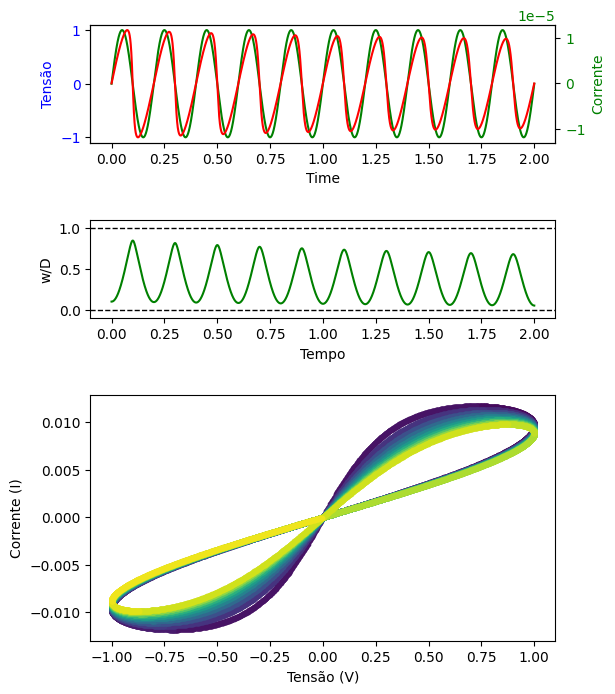

In [ ]:
def adams_bashforth_4(func, t, w, h, f_hist):
    f_n, f_n1, f_n2, f_n3 = f_hist
    return w + h/24*(55*f_n - 59*f_n1 + 37*f_n2 - 9*f_n3)

passos = int(t_total / h)

t_arr = np.zeros(passos)
w_arr = np.zeros(passos)
V_arr = np.zeros(passos)
I_arr = np.zeros(passos)
R_arr = np.zeros(passos)

w = w0

# Inicialização com RK4 para os primeiros 4 pontos
f_history = np.zeros(4)  # Armazenará os últimos 4 valores de dw/dt

for i in range(4):
    t = i * h
    V_arr[i] = V0 * np.sin(omega * t)
    R_arr[i] = R_ON * (w / D) + R_OFF * (1 - w / D)
    I_arr[i] = V_arr[i] / R_arr[i]

    dwdt = mem(t, w)
    f_history[3-i] = dwdt  # Preenche do passado mais recente para o mais antigo

    w = rk4_step(mem, t, w, h)
    w = np.clip(w, 0, D)

    t_arr[i] = t
    w_arr[i] = w

# Simulação principal com Adams-Bashforth (multi-passos)
for i in range(4, passos):
    t = i * h

    # Atualiza estado com Adams-Bashforth
    w = adams_bashforth_4(mem, t, w_arr[i-1], h, f_history)
    w = np.clip(w, 0, D)

    # Calcula variáveis do circuito
    V_arr[i] = V0 * np.sin(omega * t)
    R_arr[i] = R_ON * (w / D) + R_OFF * (1 - w / D)
    I_arr[i] = V_arr[i] / R_arr[i]

    # Atualiza histórico de derivadas
    f_history[:-1] = f_history[1:]  # Desloca histórico
    f_history[-1] = mem(t, w)  # Adiciona novo valor

    # Armazena resultados
    t_arr[i] = t
    w_arr[i] = w

V_arr_ab4 = V_arr
I_arr_ab4 = I_arr

# Criar a figura e o layout com 3 linhas
fig = plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1.2, 1, 2.5], hspace=0.5)

# --- Gráfico 1: tensão e corrente vs tempo com eixos duplos ---
ax1 = fig.add_subplot(gs[0])
ax1.set_xlabel("Time")
ax1.set_ylabel("Tensão", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1_right = ax1.twinx()
ax1_right.set_ylabel("Corrente", color='green')
ax1_right.tick_params(axis='y', labelcolor='green')

ax1.plot(t_arr, V_arr, label='Voltagem (V)', color='g')
ax1_right.plot(t_arr, I_arr * 1e-3, label='Corrente (mA)', color='red')

# --- Gráfico 2: w/D vs tempo ---
ax2 = fig.add_subplot(gs[1])
ax2.set_xlabel("Tempo")
ax2.set_ylabel("w/D")
ax2.set_ylim(-0.1, 1.1)  # como no artigo
ax2.plot(t_arr, w_arr/D, label='Tensão (V)', color='g')

# --- Gráfico 3: I vs V ---
diff = np.diff(I_arr) / np.diff(V_arr)
sinal = np.sign(diff)
muda = np.where(np.diff(sinal) != 0)[0] + 1
ax2.axhline(1, linestyle='--', color='black', linewidth=1)
ax2.axhline(0, linestyle='--', color='black', linewidth=1)

# Dividir os dados em segmentos baseados nos pontos onde a derivada muda de sinal
ax3 = fig.add_subplot(gs[2])

v_partes = np.split(V_arr[:-1], muda)
i_partes = np.split(I_arr[:-1], muda)

n_partes = len(v_partes)
initial_size = 1
size_reduction = initial_size / n_partes

for i, (v_seg, i_seg) in enumerate(zip(v_partes, i_partes)):
    color = plt.cm.viridis(i / n_partes)
    size = max(initial_size - i * size_reduction, 10)
    ax3.scatter(v_seg, i_seg, color=color, s=size, label=f'Segmento {i+1}')

ax3.set_xlabel('Tensão (V)')
ax3.set_ylabel('Corrente (I)')

# Exibir
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-2683015303.py:132: RuntimeWarning: invalid value encountered in divide
  'I': np.abs((results['AB4']['I'] - results[ref_method]['I']) / results[ref_method]['I']),
/tmp/ipython-input-15-2683015303.py:137: RuntimeWarning: divide by zero encountered in divide
  'I': np.abs((results['Adaptativo']['I'] - results[ref_method]['I']) / results[ref_method]['I']),


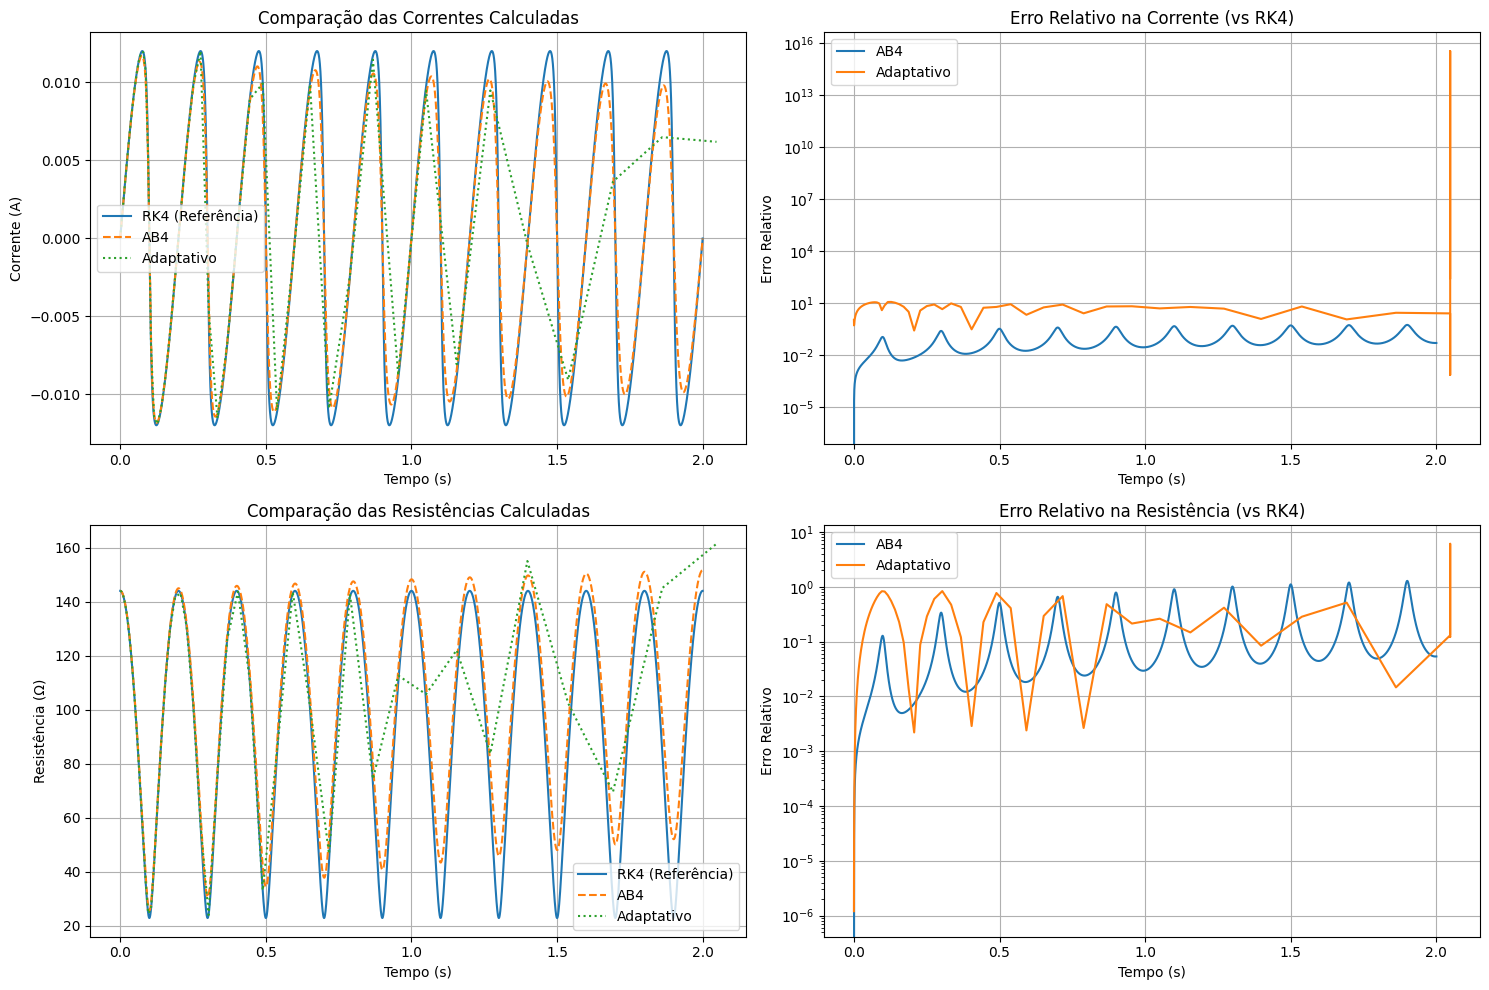


Estatísticas dos Erros Relativos:
--------------------------------
Método     | Máx w      | Médio w    | Máx I      | Médio I    | Máx R      | Médio R   
-------------------------------------------------------------------------------------
AB4        | 4.85e-01 | 1.38e-01 | 5.62e-01 | 1.05e-01 | 1.28e+00 | 1.48e-01
Adaptativo | 7.31e+00 | 1.04e+00 | 3.63e+15 | 6.11e+11 | 6.08e+00 | 1.32e+00


In [ ]:


# Arrays para armazenar resultados de cada método
methods = ['RK4', 'AB4', 'Adaptativo']
results = {
    'RK4': {'t': np.zeros(passo), 'w': np.zeros(passo), 'V': np.zeros(passo), 'I': np.zeros(passo), 'R': np.zeros(passo)},
    'AB4': {'t': np.zeros(passo), 'w': np.zeros(passo), 'V': np.zeros(passo), 'I': np.zeros(passo), 'R': np.zeros(passo)},
    'Adaptativo': {'t': np.zeros(passo), 'w': np.zeros(passo), 'V': np.zeros(passo), 'I': np.zeros(passo), 'R': np.zeros(passo)}
}


def adams_bashforth_4(func, t, w, h, f_hist):
    f_n, f_n1, f_n2, f_n3 = f_hist
    return w + h/24*(55*f_n - 59*f_n1 + 37*f_n2 - 9*f_n3)

# =============================================
# Simulação com RK4 (referência para análise de erro)
# =============================================
w = w0
for i in range(passo):
    t = i * h
    results['RK4']['V'][i] = V0 * np.sin(omega * t)
    results['RK4']['R'][i] = R_ON * (w / D) + R_OFF * (1 - w / D)
    results['RK4']['I'][i] = results['RK4']['V'][i] / results['RK4']['R'][i]

    w = rk4_step(mem, t, w, h)
    w = np.clip(w, 0, D)

    results['RK4']['t'][i] = t
    results['RK4']['w'][i] = w

# =============================================
# Simulação com AB4
# =============================================
w = w0
f_history = np.zeros(4)  # Para armazenar as últimas 4 derivadas

# Inicialização com RK4 para os primeiros 4 pontos
for i in range(4):
    t = i * h
    results['AB4']['V'][i] = V0 * np.sin(omega * t)
    results['AB4']['R'][i] = R_ON * (w / D) + R_OFF * (1 - w / D)
    results['AB4']['I'][i] = results['AB4']['V'][i] / results['AB4']['R'][i]

    dwdt = mem(t, w)
    f_history[3-i] = dwdt  # Preenche do passado mais recente para o mais antigo

    w = rk4_step(mem, t, w, h)
    w = np.clip(w, 0, D)

    results['AB4']['t'][i] = t
    results['AB4']['w'][i] = w

# Simulação principal com Adams-Bashforth
for i in range(4, passo):
    t = i * h

    # Atualiza estado com Adams-Bashforth
    w = adams_bashforth_4(mem, t, results['AB4']['w'][i-1], h, f_history)
    w = np.clip(w, 0, D)

    # Calcula variáveis do circuito
    results['AB4']['V'][i] = V0 * np.sin(omega * t)
    results['AB4']['R'][i] = R_ON * (w / D) + R_OFF * (1 - w / D)
    results['AB4']['I'][i] = results['AB4']['V'][i] / results['AB4']['R'][i]

    # Atualiza histórico de derivadas
    f_history[:-1] = f_history[1:]  # Desloca histórico
    f_history[-1] = mem(t, w)  # Adiciona novo valor

    # Armazena resultados
    results['AB4']['t'][i] = t
    results['AB4']['w'][i] = w

# =============================================
# Simulação com Passo Variado Adaptativo (simplificado)
# =============================================
w = w0
current_h = h  # Passo inicial
tolerance = 1e-6  # Tolerância para controle de erro
t_adapt = 0
i_adapt = 0

while t_adapt < t_total and i_adapt < passo:
    # Duas estimativas com passos diferentes
    w_full = rk4_step(mem, t_adapt, w, current_h)
    w_half1 = rk4_step(mem, t_adapt, w, current_h/2)
    w_half2 = rk4_step(mem, t_adapt + current_h/2, w_half1, current_h/2)

    # Estimativa de erro
    error = np.abs(w_half2 - w_full)

    # Ajuste do passo
    if error > tolerance:
        current_h = current_h * 0.9 * (tolerance/error)**0.2
        continue

    # Aceita o passo
    w = w_half2
    t_adapt += current_h

    # Armazena resultados
    results['Adaptativo']['t'][i_adapt] = t_adapt
    results['Adaptativo']['w'][i_adapt] = w
    results['Adaptativo']['V'][i_adapt] = V0 * np.sin(omega * t_adapt)
    results['Adaptativo']['R'][i_adapt] = R_ON * (w / D) + R_OFF * (1 - w / D)
    results['Adaptativo']['I'][i_adapt] = results['Adaptativo']['V'][i_adapt] / results['Adaptativo']['R'][i_adapt]

    # Aumenta o passo se o erro for muito pequeno
    if error < tolerance/10:
        current_h = current_h * 1.1

    i_adapt += 1

# Preenche os valores restantes com o último valor calculado
for i in range(i_adapt, passo):
    results['Adaptativo']['t'][i] = results['Adaptativo']['t'][i_adapt-1]
    results['Adaptativo']['w'][i] = results['Adaptativo']['w'][i_adapt-1]
    results['Adaptativo']['V'][i] = results['Adaptativo']['V'][i_adapt-1]
    results['Adaptativo']['R'][i] = results['Adaptativo']['R'][i_adapt-1]
    results['Adaptativo']['I'][i] = results['Adaptativo']['I'][i_adapt-1]

# =============================================
# Análise de Erro Comparativa
# =============================================

# Considerando RK4 como referência (mais preciso)
ref_method = 'RK4'

# Calcula erros relativos para AB4 e Adaptativo
errors = {
    'AB4': {
        'w': np.abs((results['AB4']['w'] - results[ref_method]['w']) / results[ref_method]['w']),
        'I': np.abs((results['AB4']['I'] - results[ref_method]['I']) / results[ref_method]['I']),
        'R': np.abs((results['AB4']['R'] - results[ref_method]['R']) / results[ref_method]['R'])
    },
    'Adaptativo': {
        'w': np.abs((results['Adaptativo']['w'] - results[ref_method]['w']) / results[ref_method]['w']),
        'I': np.abs((results['Adaptativo']['I'] - results[ref_method]['I']) / results[ref_method]['I']),
        'R': np.abs((results['Adaptativo']['R'] - results[ref_method]['R']) / results[ref_method]['R'])
    }
}

# Estatísticas dos erros
error_stats = {}
for method in ['AB4', 'Adaptativo']:
    error_stats[method] = {
        'max_w': np.max(errors[method]['w'][1:]),  # Ignora o primeiro ponto (possível divisão por zero)
        'mean_w': np.mean(errors[method]['w'][1:]),
        'max_I': np.max(errors[method]['I'][1:]),
        'mean_I': np.mean(errors[method]['I'][1:]),
        'max_R': np.max(errors[method]['R'][1:]),
        'mean_R': np.mean(errors[method]['R'][1:])
    }

# =============================================
# Visualização dos Resultados
# =============================================

plt.figure(figsize=(15, 10))

# Gráfico 1: Comparação das correntes
plt.subplot(2, 2, 1)
plt.plot(results['RK4']['t'], results['RK4']['I'], label='RK4 (Referência)')
plt.plot(results['AB4']['t'], results['AB4']['I'], '--', label='AB4')
plt.plot(results['Adaptativo']['t'], results['Adaptativo']['I'], ':', label='Adaptativo')
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')
plt.title('Comparação das Correntes Calculadas')
plt.legend()
plt.grid(True)

# Gráfico 2: Erros relativos da corrente
plt.subplot(2, 2, 2)
plt.plot(results['AB4']['t'], errors['AB4']['I'], label='AB4')
plt.plot(results['Adaptativo']['t'], errors['Adaptativo']['I'], label='Adaptativo')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro Relativo')
plt.title('Erro Relativo na Corrente (vs RK4)')
plt.legend()
plt.grid(True)
plt.yscale('log')

# Gráfico 3: Comparação das resistências
plt.subplot(2, 2, 3)
plt.plot(results['RK4']['t'], results['RK4']['R'], label='RK4 (Referência)')
plt.plot(results['AB4']['t'], results['AB4']['R'], '--', label='AB4')
plt.plot(results['Adaptativo']['t'], results['Adaptativo']['R'], ':', label='Adaptativo')
plt.xlabel('Tempo (s)')
plt.ylabel('Resistência (Ω)')
plt.title('Comparação das Resistências Calculadas')
plt.legend()
plt.grid(True)

# Gráfico 4: Erros relativos da resistência
plt.subplot(2, 2, 4)
plt.plot(results['AB4']['t'], errors['AB4']['R'], label='AB4')
plt.plot(results['Adaptativo']['t'], errors['Adaptativo']['R'], label='Adaptativo')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro Relativo')
plt.title('Erro Relativo na Resistência (vs RK4)')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Tabela resumo dos erros
print("\nEstatísticas dos Erros Relativos:")
print("--------------------------------")
print(f"{'Método':<10} | {'Máx w':<10} | {'Médio w':<10} | {'Máx I':<10} | {'Médio I':<10} | {'Máx R':<10} | {'Médio R':<10}")
print("-"*85)
for method in ['AB4', 'Adaptativo']:
    stats = error_stats[method]
    print(f"{method:<10} | {stats['max_w']:.2e} | {stats['mean_w']:.2e} | {stats['max_I']:.2e} | {stats['mean_I']:.2e} | {stats['max_R']:.2e} | {stats['mean_R']:.2e}")